<a href="https://colab.research.google.com/github/JurgenSchadtler/OptimizacionMeta2/blob/main/DescensoGradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
xp = np.random.uniform(-10,10,(100))
yp = 10*xp + 100 + np.random.normal(0,4,(100))

[]

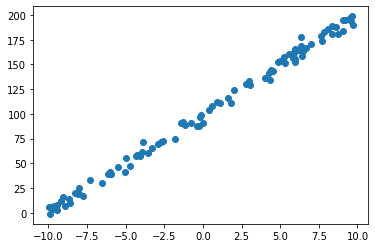

In [ ]:
plt.figure()
plt.scatter(xp,yp)
plt.plot()

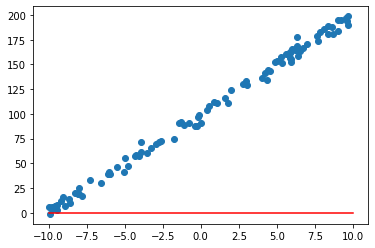

In [ ]:
#Graficar una linea y los puntos
def graficar(P,xp,yp):
    m,b = X
    plt.figure()
    plt.scatter(xp,yp)
    plt.plot([-10,10],[-10*m+b,10*m+b],c='red')
    plt.show()
m = 0
b = 0
X = [m,b]
graficar(X,xp,yp)    


In [ ]:
def error(P,xp,yp):
    e = 0
    m,b = P[0],P[1]
    #n = len(xp)
    #for i in range(n):
    #    xi = xp[i]
    #    yi = yp[i]
    #    e += ( m*xi + b - yi )**2
    e = np.sum( (m*xp + b - yp)** 2)
    return e/2
m = 10
b = 5
P = [m,b]
print(error(P,xp,yp))

453142.9422461733


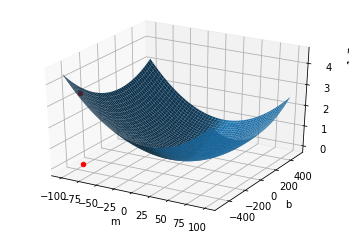

In [ ]:
M = np.arange(-100, 100, 1)
B = np.arange(-500, 500, 5)
M, B = np.meshgrid(M, B) 
E = np.zeros_like(M)
for i in range(len(M)):
    for j in range(len(B)):
        P = [ M[i,j],B[i,j] ]
        E[i,j] = error(P,xp,yp)

m = -90
b = -400
P = [m,b]
e = error(P,xp,yp)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(M,B,E)
ax.scatter(xs=[m],ys=[b],zs=[e],s=20,c='red')
ax.scatter(xs=[m],ys=[b],zs=[0],s=20,c='red')
ax.set_xlabel('m')
ax.set_ylabel('b')

plt.show()

In [ ]:
def gradient(P,xp,yp):
  g=0
  m,b = P[0],P[1]
  g = np.sum((m*xp + b - yp)* xp) , np.sum((m*xp + b - yp))
  return np.array(g)
m = 10
b = 5
P = [m,b]
print(gradient(P,xp,yp))

[-7268.75184549 -9424.0884939 ]


In [ ]:
def hessian(xp):
  h=0
  m,b = P[0],P[1]
  h = [[np.sum(xp**2) , np.sum(xp)], 
      [np.sum(xp) ,len(xp)]]
  return np.array(h)
m = 10
b = 5
P = [m,b]
print(hessian(xp)) 

[[3259.75628166   80.28100639]
 [  80.28100639  100.        ]]


K: 1000
Error: 11286646.093479581
m: 4.514735253126453
b: -370.47365579138796


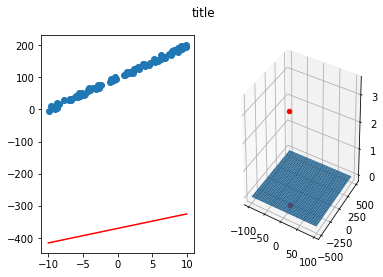

K: 2000
Error: 6859200.569636127
m: 19.396369128446537
b: -274.7599031645838


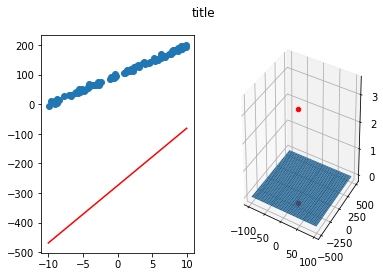

K: 3000
Error: 3683327.449470787
m: 16.866901013393132
b: -174.79190070192308


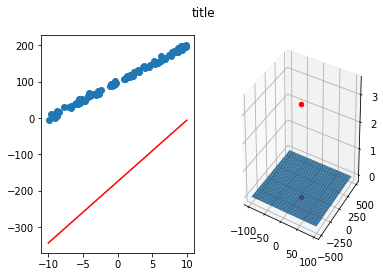

K: 4000
Error: 1487070.2722135698
m: 14.328623243188177
b: -74.82412016258594


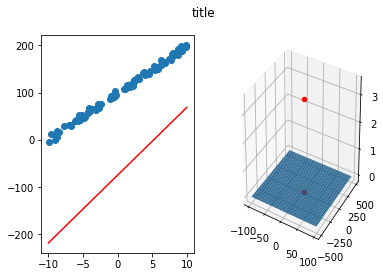

K: 5000
Error: 270428.97577390395
m: 11.790345206453763
b: 25.14366036998487


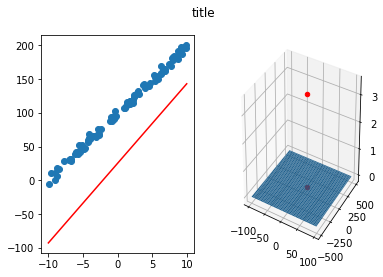

K: 6000
Error: 790.0760510125306
m: 9.884465693851372
b: 99.31493206432651


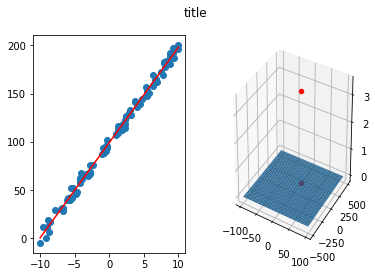

K: 7000
Error: 790.0760510125307
m: 9.884465693851372
b: 99.31493206432641


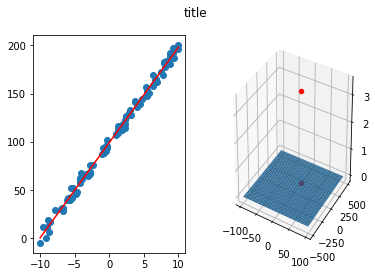

K: 8000
Error: 790.0760510125307
m: 9.884465693851372
b: 99.31493206432641


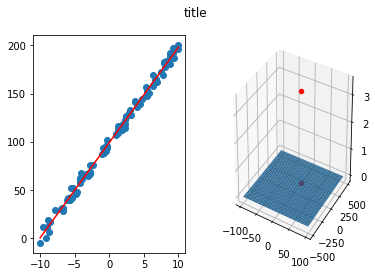

K: 9000
Error: 790.0760510125307
m: 9.884465693851372
b: 99.31493206432641


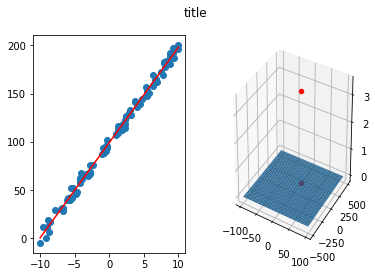

K: 10000
Error: 790.0760510125307
m: 9.884465693851372
b: 99.31493206432641


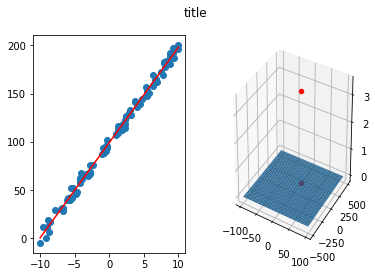

In [ ]:
M = np.arange(-100, 100, 1)
B = np.arange(-500, 500, 5)
M, B = np.meshgrid(M, B)
E = np.zeros_like(M)

def GradienteDescendiente(P,xp,yp):
  P = np.array(P)
  gradiente = gradient(P,xp,yp)
  epsilon = 1e-8
  k=0
  norma = np.sum(gradiente**2)**(1/2)

  while(k < 10000 and norma > epsilon):

    a = 0.1
    gradiente = gradient(P,xp,yp)
    norma = np.sum(gradiente **2)**(1/2)
    P = P + (a * (-gradiente/norma))

    k = k+1
    if (k%1000 == 0):
      print("K:",k)
      print("Error:", error(P,xp,yp))
      print("m:", P[0])
      print("b:", P[1])
      m=P[0]
      b=P[1]
      fig = plt.figure()
      fig.suptitle("title")
      ax = fig.add_subplot(1,2,1)
      ax.scatter(xp,yp)
      ax.plot([-10,10],[-10*m+b,10*m+b], color='red')
      ax = fig.add_subplot(1,2,2,projection='3d')
      ax.plot_surface(M,B,E)
      ax.scatter(xs=[m],ys=[b],zs=[0],s=20,c='red')
      ax.scatter(xs=[m],ys=[b],zs=[e],s=20,c='red')
      plt.show()

GradienteDescendiente([-90,-400],xp,yp)

    

K: 1
error: 11360227.804387443
m: 24.0431263324233
b: -381.93055124785747


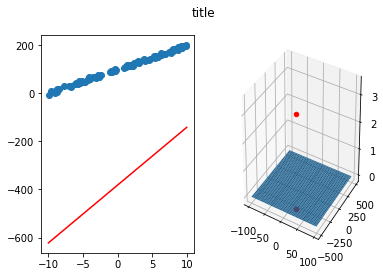

K: 2
error: 3942154.4301572824
m: -24.757529678398
b: -73.93115099568752


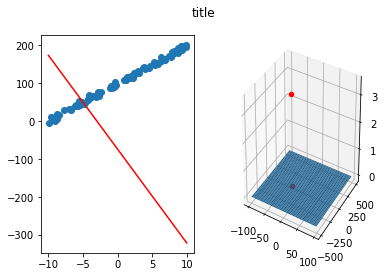

K: 3
error: 1368318.0568211102
m: 14.811820997352775
b: -67.66162492090332


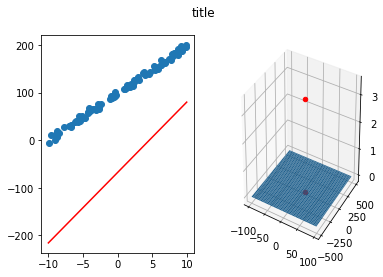

K: 4
error: 475278.4031932898
m: -2.12046008787625
b: 39.20440610120511


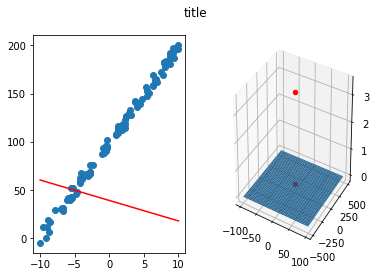

K: 5
error: 165421.9448676292
m: 11.608850597071124
b: 41.37973296045634


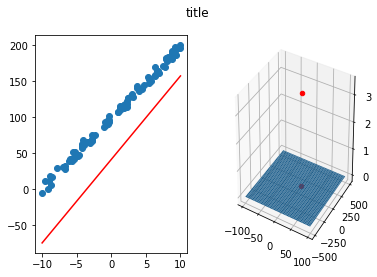

K: 6
error: 57911.57354638758
m: 5.733885664517078
b: 78.4588590141692


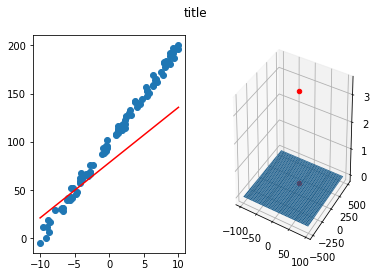

K: 7
error: 20608.881828779857
m: 10.497521374094877
b: 79.21362849564757


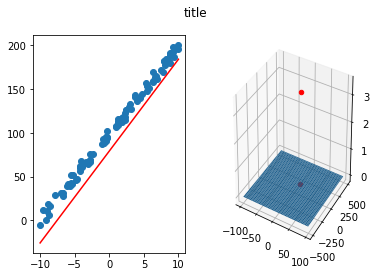

K: 8
error: 7666.029969203593
m: 8.45909472708803
b: 92.07891015491272


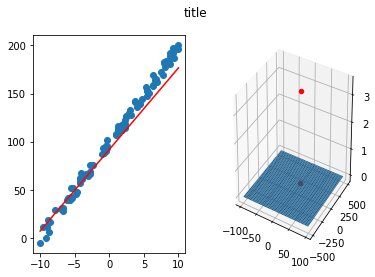

K: 9
error: 3175.2705482187375
m: 10.111925353060016
b: 92.34079124544787


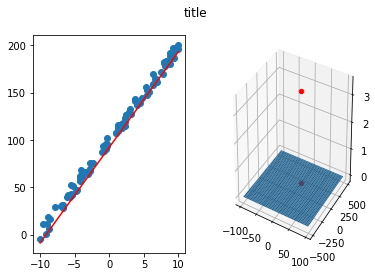

K: 10
error: 1617.1193466160735
m: 9.404655906700745
b: 96.80463626521615


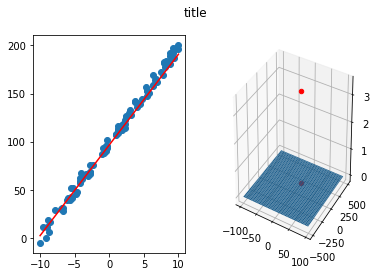

K: 11
error: 1076.4902593149698
m: 9.978135753755026
b: 96.89550070431025


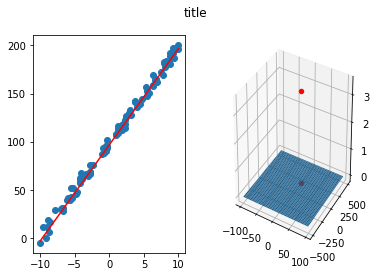

K: 12
error: 888.9090991968836
m: 9.732735670073877
b: 98.44431346163996


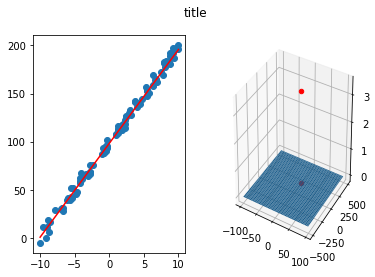

K: 13
error: 823.8243813047933
m: 9.931715002746884
b: 98.47584054240404


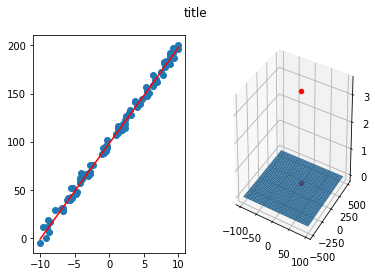

K: 14
error: 801.2420468079512
m: 9.8465689507285
b: 99.01322948548872


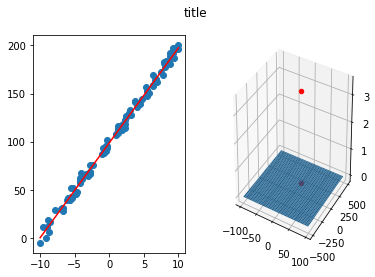

K: 15
error: 793.4066923984416
m: 9.91560847327558
b: 99.02416838338337


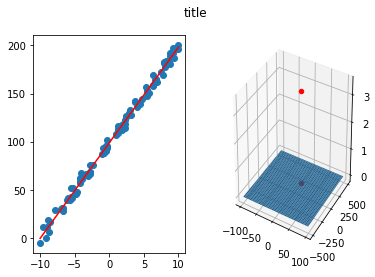

K: 16
error: 790.6880727299924
m: 9.886065491604311
b: 99.2106253161424


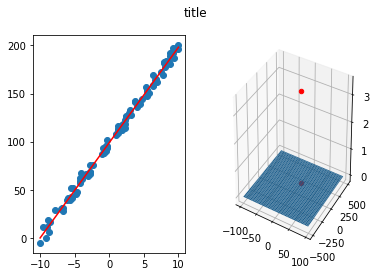

K: 17
error: 789.7447978613136
m: 9.91002001798401
b: 99.21442076704523


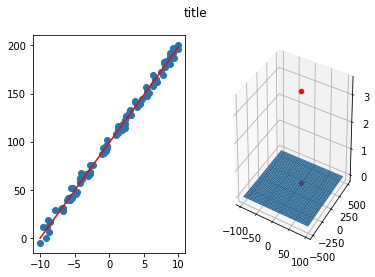

K: 18
error: 789.4175113753776
m: 9.899769539596113
b: 99.27911541367189


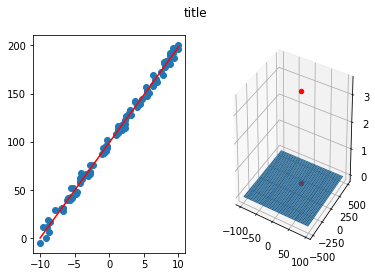

K: 19
error: 789.3039533368535
m: 9.908081001102593
b: 99.28043231485285


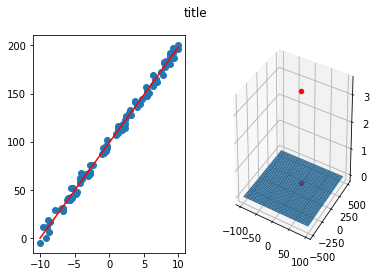

K: 20
error: 789.2645522962746
m: 9.90452440995178
b: 99.3028793069824


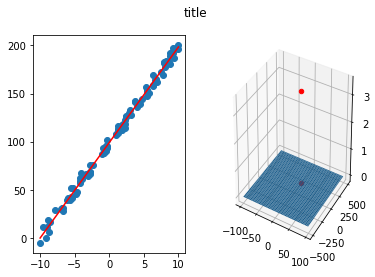

K: 21
error: 789.2508813838599
m: 9.90740822369448
b: 99.30333622995803


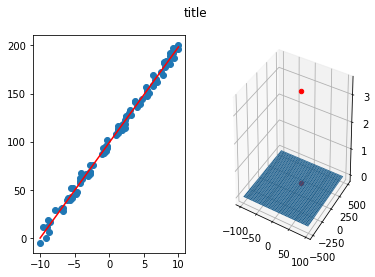

K: 22
error: 789.2461380104984
m: 9.906174199277729
b: 99.31112462485528


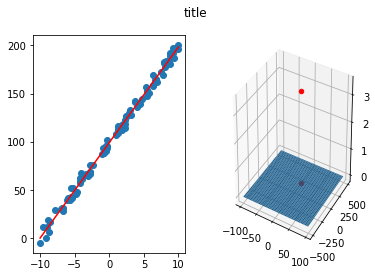

K: 23
error: 789.2444922102653
m: 9.907174791254977
b: 99.3112831626474


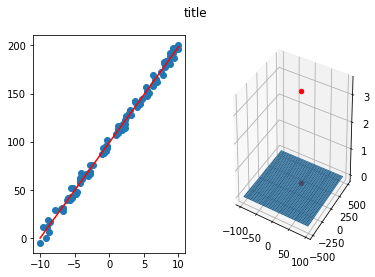

K: 24
error: 789.2439211697423
m: 9.906746623890058
b: 99.31398548885319


KeyboardInterrupt: ignored

In [ ]:
M = np.arange(-100, 100, 1)
B = np.arange(-500, 500, 5)
M, B = np.meshgrid(M, B)
E = np.zeros_like(M)

def GradienteDescendienteNewton(P,xp,yp):
  P = np.array(P)
  gradiente = gradient(P,xp,yp)
  epsilon = 1e-8
  k=0
  norma = np.sum(gradiente**2)**(1/2)

  while(k < 10000 and norma > epsilon):

    gradiente = gradient(P,xp,yp)
    norma = np.sum(gradiente **2)**(1/2)
    Pk = (-gradiente/norma)

    a1 = np.dot(-gradiente,Pk)
    a2 = np.dot(np.matmul(hessian(xp), Pk), Pk)
    a = a1/a2
    P = P + (a * (-gradiente/norma))

    k = k+1
    
    print("K:",k)
    print("error:", error(P,xp,yp))
    print("m:", P[0])
    print("b:", P[1])
    m=P[0]
    b=P[1]
    fig = plt.figure()
    fig.suptitle("title")
    ax = fig.add_subplot(1,2,1)
    ax.scatter(xp,yp)
    ax.plot([-10,10],[-10*m+b,10*m+b], color='red')
    ax = fig.add_subplot(1,2,2,projection='3d')
    ax.plot_surface(M,B,E)
    ax.scatter(xs=[m],ys=[b],zs=[0],s=20,c='red')
    ax.scatter(xs=[m],ys=[b],zs=[e],s=20,c='red')
    plt.show()

GradienteDescendienteNewton([-90,-400],xp,yp)
